In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler
import seaborn as sns
import missingno

In [2]:
rcParams['axes.prop_cycle'] = cycler(color=['dodgerblue', 'tomato', 'tab:green', 'cyan', 'yellow', 'black', 'magenta', 'pink', 'purple']) 
rcParams['figure.figsize'] = (15, 8)

Configuring the color palette to be consistent across the visualisations.

In [3]:
df = pd.read_csv('HR_Employee_Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

From the types of columns we can see that all the data types are correct, so no need to fix anything here.

In [6]:
print(*df.columns[df.dtypes == "O"].map(lambda column: f'{column}: {np.unique(df[column])}'), sep='\n')

Attrition: ['No' 'Yes']
BusinessTravel: ['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
Department: ['Human Resources' 'Research & Development' 'Sales']
EducationField: ['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
Gender: ['Female' 'Male']
JobRole: ['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
MaritalStatus: ['Divorced' 'Married' 'Single']
Over18: ['Y']
OverTime: ['No' 'Yes']


From the values of categorical variables again we can see that everything is correct, and no duplicate values are present. Moreover, for the column **Over18** the value for all rows is the same, so it won't be necessary to consider this column for further visualisations. So we can drop that column.

In [7]:
df.drop(['Over18'], axis=1, inplace=True)

In [8]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

We can see that the data doesn't contain any null values, so no need to replace them.

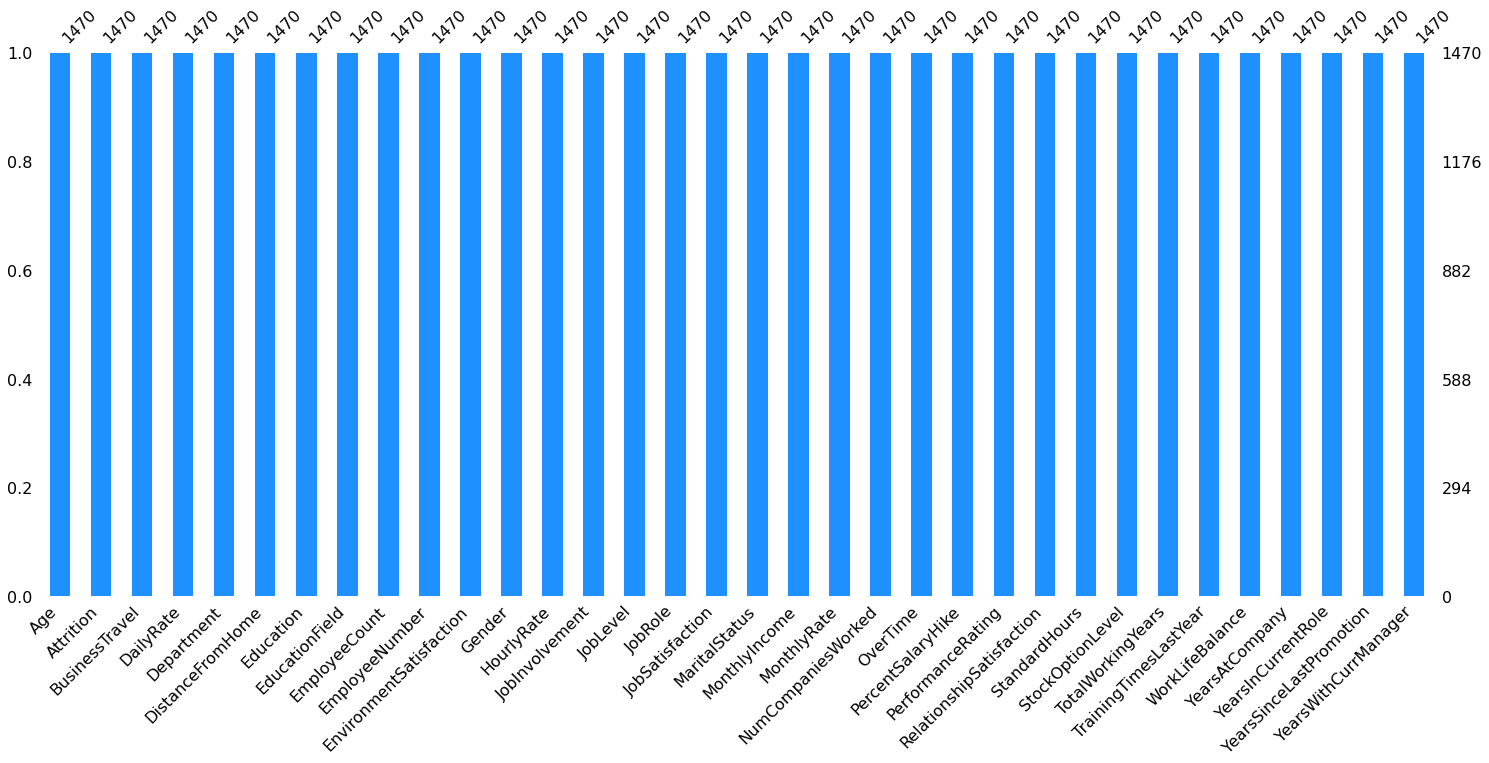

In [9]:
missingno.bar(df, color="dodgerblue")
plt.show()

The same about null values is obvious from the visualisation above.

The color is changed to **dodgerblue** in order to be consistent with other barplots.

In [10]:
df.head(100)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,No,Travel_Rarely,1217,Research & Development,2,4,Technical Degree,1,126,...,1,80,1,16,5,1,4,3,0,3
96,24,No,Travel_Rarely,1353,Sales,3,2,Other,1,128,...,1,80,1,4,2,2,3,2,0,2
97,28,No,Non-Travel,120,Sales,4,3,Medical,1,129,...,2,80,0,5,3,4,5,4,0,4
98,58,No,Travel_Rarely,682,Sales,10,4,Medical,1,131,...,3,80,0,38,1,2,37,10,1,8


### Distributions

For visualising distributions, let us choose the columns **Age** and **MonthlyIncome**, as they will show 1. what is the expected age range and 2. which range of salary is most common among the employees.

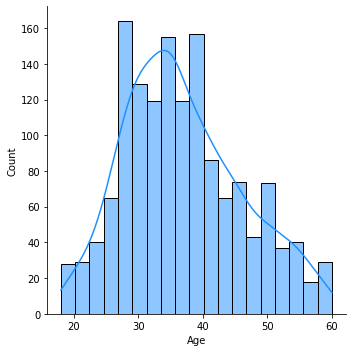

In [11]:
sns.displot(df['Age'], kde=True)
plt.show()

From the plot we can see, that its close to normal distribution, most of the values being concentrated in range 25-40, which is logical. Because its the age most people start building their career.

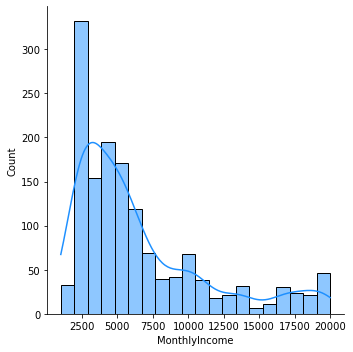

In [12]:
sns.displot(df['MonthlyIncome'], kde=True)
plt.show()

From the plot of monthly income we can see that the distribution is right-skewed, so it can be resembled to the fact that most employees have some average monthly income, which is actually much close to the minimum income than the maximum one.

### Boxplot

Let us take the columns **MonthlyIncome** and **MaritalStatus** to see how the monthly income changes depending on the marital status (single, married or divorced).

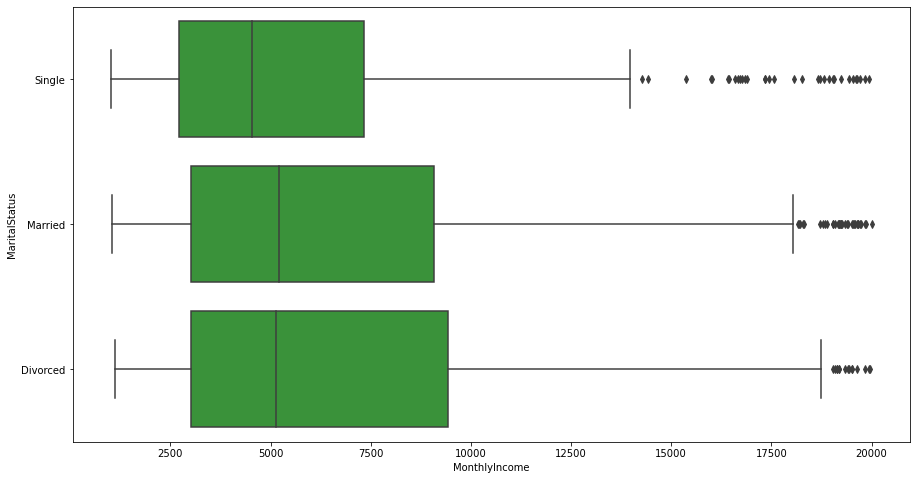

In [13]:
sns.boxplot(data=df, x="MonthlyIncome", y="MaritalStatus", color="tab:green")
plt.show()

The median monthly income, as well as the 1st quartile for married and divorced group is almost the same, but for single group all quartiles are smaller, this can mean that mostly single people are younger compared to married and divorced people and that's why the overall monthly income range for them is smaller. Although, that group has a lot of outliers that reach to the range covered by the other two groups. 

And for the color of boxplots, I fixed the color for all of them to be the same, as we already know that each of them as about separate category and the categories are written next to them. Chose **tab:green** from the palette.

### Pie Charts

For visualising data as a pie chart, first let's consider the column **Gender**.

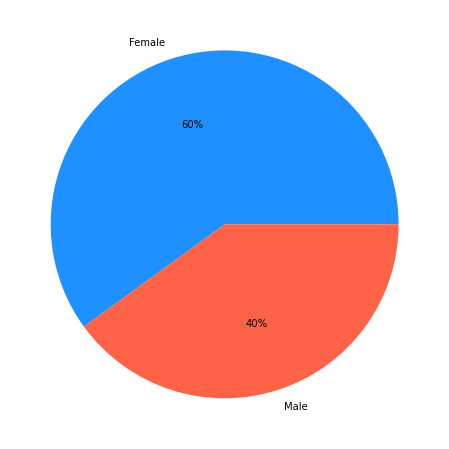

In [14]:
gender = df['Gender'].value_counts()

plt.pie(gender.values, labels=['Female', 'Male'], autopct='%.0f%%')

plt.show()


If we look at the values of **Department** column, it has 'Human Resources' 'Research & Development' and 'Sales', so the data is only covering the employees from these departments. And based on the pie chart, percentage of females working in these spheres is more (60%) compared to males (40%).

And for the colors, as pie chart is comparison visualisation, distant colors are selected.

For next, let's use **MaritalStatus** and **OverTime** columns.

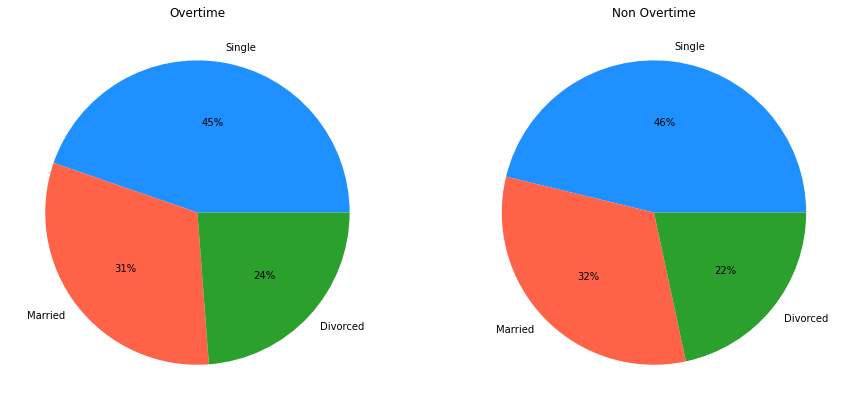

In [15]:
df_overtime = df[df['OverTime'] == 'Yes']
df_no_overtime = df[df['OverTime'] == 'No']

marital_overtime = df_overtime['MaritalStatus'].value_counts()
marital_no_overtime = df_no_overtime['MaritalStatus'].value_counts()

plt.subplot(121)
plt.title('Overtime')
plt.pie(marital_overtime.values, labels=['Single', 'Married', 'Divorced'], autopct='%.0f%%')
plt.subplot(122)
plt.title('Non Overtime')
plt.pie(marital_no_overtime.values, labels=['Single', 'Married', 'Divorced'], autopct='%.0f%%')
plt.show()

We can see that the proportions of employees are almost the same based on categories of empoyees staying overtime or not, which is surprising actually, because it would be expected that in case of overtime the percentage of single employees will higher, and in case of non-overtime the percentage of married employees.

And for the colors, as pie chart is comparison visualisation, distant colors are selected consistent to the previous visualisation.

### Barcharts

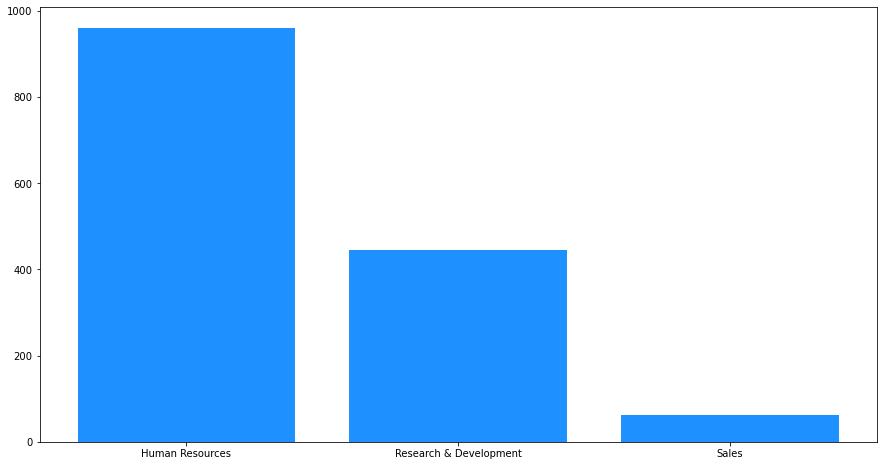

In [16]:
df_department = df['Department'].value_counts()
plt.bar(['Human Resources', 'Research & Development', 'Sales'], df_department.values)
plt.show()

We can see that the majority of employees are in **Human Resources**, around half of them are in **Research & Development**, and very few amount of employees are in **Sales**.

The same color is used for all categories, as there is no need to differentiate them based on color (labels are enough).

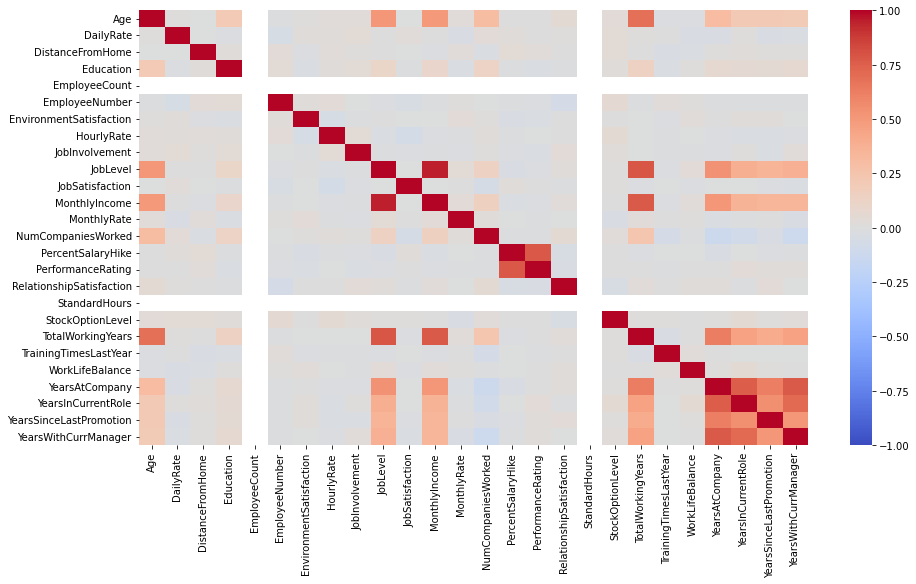

In [17]:
df_numeric = df[df.columns[df.dtypes != "O"]]
sns.heatmap(df_numeric.corr(), cmap='coolwarm', vmin=-1., vmax=1.)
plt.show()

From the correlation matrix we can see that more or less strong positive correlation is present among the last columns, i.e. **YearsAtCompany**, **YearsInCurrentRole**, **YearsSinceLastPromotion** and **YearsWithCurrentManager**. It's actually intuitive, that these variables have relatively high correlation, because for example if the years in current role in high, years since last promotion will also be high in most of the cases. The same way years at some company and years with current manager also have high correlation, because if someone is workig at some company for several years, there is a high chance that the years with current manager will also be long.

Also, the **MonthlyIncome** and **JobLevel** have very high positive correlation, because higher someone's professional level, salary also is expected to be higher.

There are no any significant negative correlations.

The **coolwarm** color map is used for correlation matrix, as it goes from blue to red for values going from -1 to 1, indicating the colors going from cold to warm.